In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sbn
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta
import os
import EDA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Datos

In [4]:
df=pd.read_csv(r"C:\Users\eguen\Documents\Smart Energy Technologies\combined_cleaned_data_incomplete.csv")
date_columns = pd.to_datetime(df.columns[1:])
last_date = date_columns.max().date()
current_date = datetime.now().date()
# Definir la fecha de finalización específica
end_date = datetime.strptime('2024-07-05', '%Y-%m-%d').date()
date_range = pd.date_range(start=last_date + timedelta(days=1), end=end_date, freq='D')
for single_date in date_range:
    col_name = single_date.strftime('%Y-%m-%d')
    df[col_name] = 0  # Agregar nueva columna con cero

In [5]:
df.replace(0, np.nan, inplace=True)
datos = df.transpose()
datos.columns = datos.iloc[0]
datos=datos.drop(index="NIC")
datos = datos.astype(float)

In [4]:
start_date = '2024-05-28'
end_date = '2024-07-01'
filtered=datos.loc[start_date:end_date]
filtered=filtered.drop(["606590824"],axis=1)

In [5]:
len(filtered.columns)

56

# KNNR

In [12]:
# Normalizar los datos
scaler = StandardScaler()
filtered_scaled = pd.DataFrame(scaler.fit_transform(filtered), columns=filtered.columns)

In [13]:
# Imputación usando KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
imp = IterativeImputer(estimator=knn_regressor, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman')
Imputed_data_knn = pd.DataFrame(imp.fit_transform(filtered_scaled), columns=filtered.columns)

[IterativeImputer] Completing matrix with shape (35, 56)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.34
[IterativeImputer] Change: 27.552290460305883, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.59
[IterativeImputer] Change: 1.3322676295501878e-15, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Early stopping criterion reached.


In [14]:
Imputed_data_knn = pd.DataFrame(scaler.inverse_transform(Imputed_data_knn), columns=filtered.columns)

In [15]:
Imputed_data_knn.index=filtered.index

In [16]:
Imputed_data_knn.loc["2024-06-28":"2024-07-01"]

NIC,605442307,605443194,605444971,605446435,605447212,605448009,605449886,605450612,605451409,605452286,...,606586647,606587424,606588201,606589098,606591601,606592498,606593275,606594052,606597303,INTMT_2818
2024-06-28,84579.10125,92408.98875,138350.4725,77423.127500,56.273750,113284.4575,218985.040,216819.690,989580.696875,244404.505,...,85.576875,30954.585,6731.688125,92200.6575,37.88375,14.046250,587196.70,73889.36125,295199.92,766119.780
2024-06-29,84396.14625,92152.72150,137753.5880,77250.870125,55.775125,113283.4860,218399.741,216468.849,989580.590375,243618.465,...,85.396250,30954.584,6731.687875,92200.6575,37.80700,13.974375,585762.38,73669.47450,294660.14,718433.676
2024-06-30,84396.14625,92152.72150,137753.5880,77250.870125,55.775125,113283.4860,218399.741,216468.849,989580.590375,243618.465,...,85.396250,30954.584,6731.687875,92200.6575,37.80700,13.974375,585762.38,73669.47450,294660.14,718433.676
2024-07-01,84396.14625,92152.72150,137753.5880,77250.870125,55.775125,113283.4860,218399.741,216468.849,989580.590375,243618.465,...,85.396250,30954.584,6731.687875,92200.6575,37.80700,13.974375,585762.38,73669.47450,294660.14,718433.676


# Linear Regressor

In [211]:
# Imputación usando Linear
regressor = LinearRegression()
imp = IterativeImputer(estimator=regressor, missing_values=np.nan, max_iter=5, verbose=2, imputation_order='descending')
Imputed_data_linear = pd.DataFrame(imp.fit_transform(datos.drop(["606590824"],axis=1)))

[IterativeImputer] Completing matrix with shape (35, 56)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.04
[IterativeImputer] Change: 75196.91625309945, scaled tolerance: 989.5806968750001 
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.07
[IterativeImputer] Change: 6.308674471711129e-09, scaled tolerance: 989.5806968750001 
[IterativeImputer] Early stopping criterion reached.


In [216]:
Imputed_data_linear.index=filtered.index

In [217]:
Imputed_data_linear.loc["2024-06-28":"2024-07-01"]

NIC,605442307,605443194,605444971,605446435,605447212,605448009,605449886,605450612,605451409,605452286,...,606586647,606587424,606588201,606589098,606591601,606592498,606593275,606594052,606597303,INTMT_2818
2024-06-28,84579.101250,92408.988750,138350.472500,77423.127500,56.273750,113284.457500,218985.040,216819.690000,989580.696875,244404.505,...,85.576875,30954.585000,6731.688125,92200.6575,37.883750,14.046250,587196.70,73889.361250,295199.920000,766119.780000
2024-06-29,84293.509028,91986.908472,137333.694722,77128.089375,55.512535,113282.902778,217990.745,216302.567222,989580.506944,243091.845,...,85.274028,30954.583021,6731.687083,92200.6575,37.757083,13.945729,584794.48,73554.919792,294294.514444,704052.549526
2024-06-30,84293.509028,91986.908472,137333.694722,77128.089375,55.512535,113282.902778,217990.745,216302.567222,989580.506944,243091.845,...,85.274028,30954.583021,6731.687083,92200.6575,37.757083,13.945729,584794.48,73554.919792,294294.514444,704052.549526
2024-07-01,84293.509028,91986.908472,137333.694722,77128.089375,55.512535,113282.902778,217990.745,216302.567222,989580.506944,243091.845,...,85.274028,30954.583021,6731.687083,92200.6575,37.757083,13.945729,584794.48,73554.919792,294294.514444,704052.549526


# RF regressor

In [212]:
# Imputación usando Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
imp = IterativeImputer(estimator=regressor, missing_values=np.nan, max_iter=5, verbose=2, imputation_order='roman')
Imputed_data_RF = pd.DataFrame(imp.fit_transform(filtered), columns=filtered.columns)

[IterativeImputer] Completing matrix with shape (35, 56)
[IterativeImputer] Ending imputation round 1/5, elapsed time 3.79
[IterativeImputer] Change: 92256.85301650994, scaled tolerance: 989.5806968750001 
[IterativeImputer] Ending imputation round 2/5, elapsed time 7.63
[IterativeImputer] Change: 682.0605411555175, scaled tolerance: 989.5806968750001 
[IterativeImputer] Early stopping criterion reached.


In [219]:
Imputed_data_RF.index=filtered.index

In [220]:
Imputed_data_RF.loc["2024-06-28":"2024-07-01"]

NIC,605442307,605443194,605444971,605446435,605447212,605448009,605449886,605450612,605451409,605452286,...,606586647,606587424,606588201,606589098,606591601,606592498,606593275,606594052,606597303,INTMT_2818
2024-06-28,84579.10125,92408.988750,138350.4725,77423.127500,56.273750,113284.4575,218985.04000,216819.69000,989580.696875,244404.50500,...,85.576875,30954.585000,6731.688125,92200.6575,37.883750,14.046250,587196.7000,73889.361250,295199.92000,766119.780
2024-06-29,84374.81560,92118.831775,137674.4815,77228.302969,55.714919,113283.3669,218331.04645,216487.19525,989580.590138,243523.09105,...,85.377300,30954.583781,6731.687631,92200.6575,37.799075,13.969656,585621.7804,73652.685987,294598.87015,758148.642
2024-06-30,84374.81560,92118.831775,137674.4815,77228.302969,55.714919,113283.3669,218331.04645,216487.19525,989580.590138,243523.09105,...,85.377300,30954.583781,6731.687631,92200.6575,37.799075,13.969656,585621.7804,73652.685987,294598.87015,758148.642
2024-07-01,84374.81560,92118.831775,137674.4815,77228.302969,55.714919,113283.3669,218331.04645,216487.19525,989580.590138,243523.09105,...,85.377300,30954.583781,6731.687631,92200.6575,37.799075,13.969656,585621.7804,73652.685987,294598.87015,758148.642


# SVR Regresor

In [6]:
# Normalizar los datos
scaler = StandardScaler()
filtered_scaled = pd.DataFrame(scaler.fit_transform(filtered), columns=filtered.columns)

In [7]:
# Imputación usando SVR
svr_regressor = SVR(kernel='rbf', tol=1, C=500, epsilon=0.00001)
imp = IterativeImputer(estimator=svr_regressor, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman')
Imputed_data_svr = pd.DataFrame(imp.fit_transform(filtered_scaled), columns=filtered.columns)

[IterativeImputer] Completing matrix with shape (35, 56)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Change: 3.8276544446571927, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.06
[IterativeImputer] Change: 4.002681693477268, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.09
[IterativeImputer] Change: 6.2838005711376255, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.12
[IterativeImputer] Change: 10.024921365363546, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.14
[IterativeImputer] Change: 16.000736112113387, scaled tolerance: 0.0017904210336454596 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.17
[IterativeImputer] Change: 18.859193729794875, scaled tolerance: 0.0017904210336454596 
[IterativeImpu

In [8]:
#Invertir la normalización
Imputed_data_svr = pd.DataFrame(scaler.inverse_transform(Imputed_data_svr), columns=filtered.columns)
Imputed_data_svr.index=filtered.index

In [9]:
Imputed_data_svr.loc["2024-06-18":"2024-06-28"]

NIC,605442307,605443194,605444971,605446435,605447212,605448009,605449886,605450612,605451409,605452286,...,606586647,606587424,606588201,606589098,606591601,606592498,606593275,606594052,606597303,INTMT_2818
2024-06-18,84355.27125,92088.01000,137612.0250,77210.868750,55.658750,113283.2775,218267.170,216472.945,989580.525625,243446.505,...,85.359375,30954.583125,6731.687500,92200.6575,37.791250,13.963750,585447.82,73630.29250,294527.090,727758.775212
2024-06-19,84376.12000,92121.66375,137677.1300,77227.545000,55.714375,113283.3625,218332.865,216514.950,989580.605625,243514.000,...,85.376250,30954.583125,6731.687500,92200.6575,37.797500,13.968750,585594.58,73646.82250,294589.940,732970.978093
2024-06-20,84392.43875,92145.68375,137749.4925,77249.016875,55.770000,113283.4725,218391.285,216399.240,989580.606875,243617.455,...,85.391875,30954.583750,6731.688125,92200.6575,37.806875,13.974375,585763.30,73669.22375,294656.515,738502.335481
2024-06-21,84417.32875,92187.09250,137825.5350,77272.343125,55.833125,113283.5975,218465.895,216451.190,989580.606875,243708.620,...,85.415000,30954.585000,6731.688125,92200.6575,37.815000,13.979375,585906.86,73690.38250,294727.880,744195.384083
2024-06-22,84439.57250,92221.15750,137903.7575,77294.576875,55.899375,113283.7200,218541.490,216505.920,989580.606875,243805.745,...,85.438750,30954.585000,6731.688125,92200.6575,37.824375,13.985625,586099.34,73710.65125,294799.275,749275.991403
2024-06-23,84462.37125,92252.54625,137980.9000,77311.188125,55.958125,113283.8400,218617.660,216555.120,989580.611250,243902.745,...,85.461250,30954.585000,6731.688125,92200.6575,37.833750,13.993750,586327.78,73737.96000,294867.840,753788.087655
2024-06-24,84482.15750,92282.27250,138049.1000,77330.181250,56.019375,113283.9600,218681.545,216606.475,989580.611250,243988.965,...,85.478125,30954.585000,6731.688125,92200.6575,37.843750,14.003750,586513.42,73767.23750,294934.275,757502.716092
2024-06-25,84503.77750,92311.22500,138122.0350,77351.130625,56.079375,113284.0825,218754.520,216655.925,989580.616250,244089.755,...,85.500625,30954.585000,6731.688125,92200.6575,37.853750,14.013125,586682.26,73795.85375,295002.335,760723.967262
2024-06-26,84530.42375,92344.38875,138200.2325,77376.187500,56.143750,113284.2050,218832.395,216711.105,989580.696250,244184.770,...,85.524375,30954.585000,6731.688125,92200.6575,37.863125,14.022500,586851.42,73824.59875,295070.855,757260.540000
2024-06-27,84553.47375,92375.98750,138272.5125,77401.379375,56.209375,113284.3300,218907.995,216765.715,989580.696250,244284.485,...,85.548125,30954.585000,6731.688125,92200.6575,37.873750,14.034375,587017.42,73857.34750,295137.425,761669.700000


In [14]:
from sklearn.linear_model import LinearRegression
df=Imputed_data_svr.loc["2024-06-18":"2024-06-28"]
#Filtra datos hasta el 28 de junio de 2024
df_train = df.loc[:'2024-06-28']

# Asegúrate de que el índice sea de tipo datetime (por si acaso)
df_train.index = pd.to_datetime(df_train.index)


# Lista para almacenar las predicciones de todas las columnas
predicciones_totales = []

# Iterar sobre cada columna en el DataFrame
for column in df_train.columns:
    # Preparar datos de entrenamiento para esta columna
    X_train = df_train.index.to_julian_date().values.reshape(-1, 1)  # Fechas convertidas a julian date
    y_train = df_train[column].values  # Valores de la columna actual
    
    # Crear modelo de regresión lineal
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Generar fechas de predicción hasta el 1 de julio de 2024
    fechas_prediccion = pd.date_range(start='2024-06-29', end='2024-07-01', freq='D')
    X_prediccion = fechas_prediccion.to_julian_date().values.reshape(-1, 1)

    # Realizar predicciones para esta columna
    predicciones_columna = lr.predict(X_prediccion)

    # Guardar las predicciones en la lista de predicciones totales
    predicciones_totales.append(predicciones_columna)

# Crear un DataFrame con las fechas y las predicciones para todas las columnas
df_predicciones = pd.DataFrame(index=fechas_prediccion)
for i, column in enumerate(df_train.columns):
    df_predicciones[f'Predicción_{column}'] = predicciones_totales[i]

print(df_predicciones)

            Predicción_605442307  Predicción_605443194  Predicción_605444971  \
2024-06-29          84596.985250          92441.420591         138421.980955   
2024-06-30          84619.330727          92473.490443         138496.202136   
2024-07-01          84641.676205          92505.560295         138570.423318   

            Predicción_605446435  Predicción_605447212  Predicción_605448009  \
2024-06-29          77440.576227             56.330239         113284.564682   
2024-06-30          77461.770068             56.391955         113284.684477   
2024-07-01          77482.963909             56.453670         113284.804273   

            Predicción_605449886  Predicción_605450612  Predicción_605451409  \
2024-06-29         219048.742091         216815.247091         989580.707818   
2024-06-30         219120.837591         216853.268955         989580.721545   
2024-07-01         219192.933091         216891.290818         989580.735273   

            Predicción_605452286  ...

In [6]:
datos.loc["2024-06-25":"2024-06-28"]

NIC,605442307,605443194,605444971,605446435,605447212,605448009,605449886,605450612,605451409,605452286,...,606587424,606588201,606589098,606590824,606591601,606592498,606593275,606594052,606597303,INTMT_2818
2024-06-25,84503.77750,92311.22500,138122.0350,77351.130625,56.079375,113284.0825,218754.520,216655.925,989580.616250,244089.755,...,30954.585,6731.688125,92200.6575,NaN,37.853750,14.013125,586682.26,73795.85375,295002.335,NaN
2024-06-26,84530.42375,92344.38875,138200.2325,77376.187500,56.143750,113284.2050,218832.395,216711.105,989580.696250,244184.770,...,30954.585,6731.688125,92200.6575,NaN,37.863125,14.022500,586851.42,73824.59875,295070.855,757260.54
2024-06-27,84553.47375,92375.98750,138272.5125,77401.379375,56.209375,113284.3300,218907.995,216765.715,989580.696250,244284.485,...,30954.585,6731.688125,92200.6575,NaN,37.873750,14.034375,587017.42,73857.34750,295137.425,761669.70
2024-06-28,84579.10125,92408.98875,138350.4725,77423.127500,56.273750,113284.4575,218985.040,216819.690,989580.696875,244404.505,...,30954.585,6731.688125,92200.6575,NaN,37.883750,14.046250,587196.70,73889.36125,295199.920,766119.78


In [15]:
df_predicciones.head()

,Predicción_605442307,Predicción_605443194,Predicción_605444971,Predicción_605446435,Predicción_605447212,Predicción_605448009,Predicción_605449886,Predicción_605450612,Predicción_605451409,Predicción_605452286,...,Predicción_606586647,Predicción_606587424,Predicción_606588201,Predicción_606589098,Predicción_606591601,Predicción_606592498,Predicción_606593275,Predicción_606594052,Predicción_606597303,Predicción_INTMT_2818
2024-06-29,84596.985250,92441.420591,138421.980955,77440.576227,56.330239,113284.564682,219048.742091,216815.247091,989580.707818,244478.106818,...,85.590955,30954.585670,6731.688318,92200.6575,37.891523,14.048057,587381.809091,73903.853614,295272.905636,772023.936817
2024-06-30,84619.330727,92473.490443,138496.202136,77461.770068,56.391955,113284.684477,219120.837591,216853.268955,989580.721545,244573.737500,...,85.612619,30954.585858,6731.688369,92200.6575,37.900915,14.056284,587560.581818,73929.954500,295340.914909,775698.104237
2024-07-01,84641.676205,92505.560295,138570.423318,77482.963909,56.453670,113284.804273,219192.933091,216891.290818,989580.735273,244669.368182,...,85.634284,30954.586045,6731.688420,92200.6575,37.910307,14.064511,587739.354545,73956.055386,295408.924182,779372.271656


In [16]:
df_predicciones.to_csv("Datos\Predicciones_07_01.csv")

# Arima

c:\Users\eguen\miniconda3\envs\machine\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\eguen\miniconda3\envs\machine\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


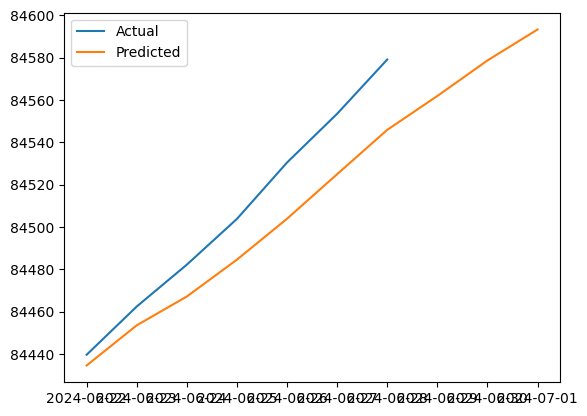

In [404]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Supongamos que 'filtered' tiene una sola columna de datos de series temporales que deseas predecir
y = filtered.iloc[:, 0]  # Selecciona la columna de interés

# Asegurarse de que el índice tiene la frecuencia establecida
y.index = pd.to_datetime(y.index)
y = y.asfreq('D')

# Divide los datos en entrenamiento y prueba
train, test = y[:-10], y[-10:]

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Hacer predicciones
forecast = model_fit.forecast(steps=len(test))

# Graficar los resultados
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, label='Predicted')
plt.legend()
plt.show()
